In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
models_test_gini_df = pd.read_csv('/home/kate/data/ClaimPrediction/exibit/models_test_gini.csv', index_col=None)
models_train_gini_df = pd.read_csv('/home/kate/data/ClaimPrediction/exibit/models_train_gini.csv', index_col=None)

In [4]:
#name of a model we compare to all other models
BaseModel='BaseModel'

In [5]:
#2.Polynomial interpolation to see a trens
import numpy.polynomial.polynomial as poly
def polyfit(X,Y):
    coefs = poly.polyfit(X, Y, 1)
    return poly.polyval(X.tolist(), coefs)

In [6]:
def get_model_data(Model_test,Model_train,model):
    df_test=Model_test[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[0]].transpose()
    df_test.columns=['TestGini1']
    df_train=Model_train[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[0]].transpose()
    df_train.columns=['TrainGini1']
    df=df_test.join(df_train)
    df.reset_index(inplace=True)
    df.columns=['Size','TestGini1','TrainGini1']
    df['Size']=df.apply(lambda c: c.Size.replace('S', ''), axis=1)
    df['Size']=df['Size'].apply(pd.to_numeric)
    df[model]=df['TrainGini1'] - df['TestGini1']
    df['TestGini1_p']=polyfit(df['Size'], df['TestGini1'])
    df['TrainGini1_p']=polyfit(df['Size'], df['TrainGini1'])
    return df

In [7]:
def viz_test_train(df,model):
    df.plot(x='Size', y=['TrainGini1','TestGini1','TrainGini1_p','TestGini1_p'],figsize=(10,5))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title('%s Train and Test'%(model), color='black')

In [8]:
def viz_compare_to_BaseModel(df,BaseModel,model):
    df.plot(x='Size', y=[BaseModel,model],figsize=(10,5))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title('Difference between Train and Test for %s and %s'%(BaseModel,model), color='black')

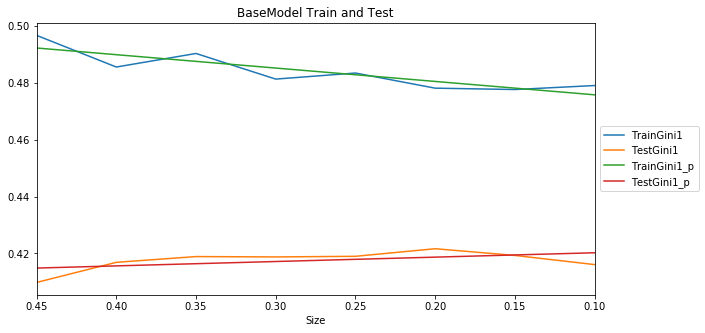

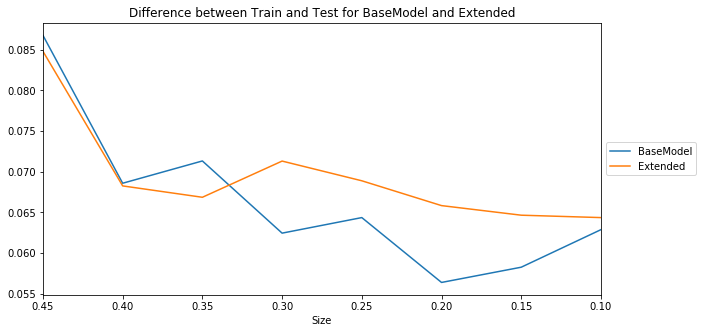

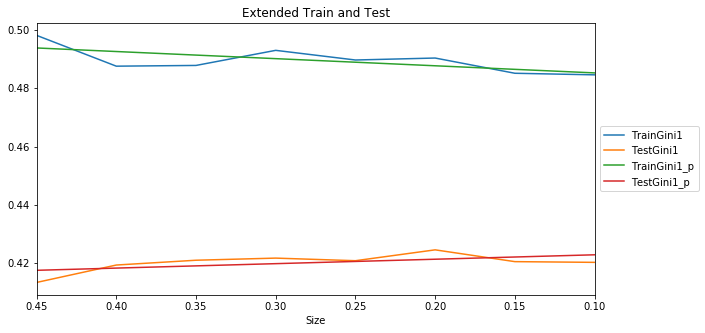

In [9]:
for m in models_test_gini_df['Model'].tolist():
    Model=m
    Model_test=models_test_gini_df[models_test_gini_df['Model']==m]
    Model_train=models_train_gini_df[models_train_gini_df['Model']==m]
    df=get_model_data(Model_test,Model_train,m)
    if m==BaseModel:
        BaseModel_df=df
    else:
        df=df.join(BaseModel_df, lsuffix='', rsuffix='2')
        df.drop('Size2',1,inplace=True)
        viz_compare_to_BaseModel(df,BaseModel,m)
    viz_test_train(df,m)